**CIFAR dataset:**

The CIFAR dataset is a popular benchmark dataset in the field of computer vision and machine learning. It is a collection of labeled images used to train and test machine learning models, particularly for image classification tasks. The dataset is widely used because it represents a real-world problem and introduces several challenges that students should be aware of.

**Classification Problem:**

The classification problem of the CIFAR dataset is to correctly categorize images into predefined classes. For CIFAR-10, there are ten distinct classes, and for CIFAR-100, there are one hundred classes. Each image belongs to one of these classes, and the goal is to design a model that can accurately assign the correct class label to each image.





In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

In [2]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 35s 0us/step


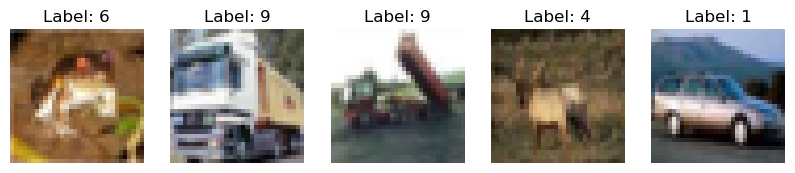

In [3]:
# Display a few images before model development, Hint - plt.title(f"Label: {y_train[i].argmax()}") will give you True Label.
# Your code to display a few images before the model development.
(X_train, y_train), (_, _) = cifar10.load_data()

plt.figure(figsize=(10, 5))
for i in range(5):  # Displaying 5 images
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i][0]}")
    plt.axis('off')

plt.show()

In [4]:
# Preprocess the data
X_train = X_train.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
X_test = X_test.astype('float32') / 255.0
y_test = to_categorical(y_test, 10)

In [5]:
# Create an MLP model using Keras
mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=X_train.shape[1:]))
mlp_model.add(Dense(512, activation='relu'))
mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(Dense(10, activation='softmax'))
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train and evaluate the MLP classifier
mlp_model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10


1563/1563 [==============================] - 21s 12ms/step - loss: 1.8533 - accuracy: 0.3295
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6700 - accuracy: 0.3995
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5911 - accuracy: 0.4281
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5348 - accuracy: 0.4499
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5078 - accuracy: 0.4586
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4719 - accuracy: 0.4731
Epoch 7/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4470 - accuracy: 0.4831
Epoch 8/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4223 - accuracy: 0.4901
Epoch 9/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4017 - accuracy: 0.4991
Epoch 10/10
1563/1563 [==============================] - 17s 1

In [7]:
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"MLP Test Accuracy: {mlp_accuracy * 100:.2f}%")

MLP Test Accuracy: 48.24%


In [8]:
# Create a CNN model using Keras
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train and evaluate the CNN classifier
cnn_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 40s 24ms/step - loss: 1.5385 - accuracy: 0.4375
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1864 - accuracy: 0.5787
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0406 - accuracy: 0.6349
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9434 - accuracy: 0.6716
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8606 - accuracy: 0.7004
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8053 - accuracy: 0.7166
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7516 - accuracy: 0.7382
Epoch 8/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7100 - accuracy: 0.7509
Epoch 9/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6694 - accuracy: 0.7665
Epoch 10/10
1563/1563 [==============================] - 39s 25m

In [10]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")

CNN Test Accuracy: 70.41%


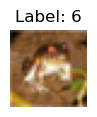

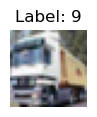

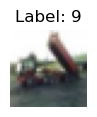

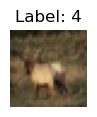

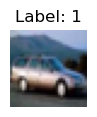

In [11]:
# Display a few images after CNN model development
for i in range(5):
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
    plt.show()



Based on the aforementioned code, perform the following activity:


1.   Using the provided code, create one distinct CNN models with architectures different from the one provided.


2.  Train the model with three different optimizers selected from the options available at https://keras.io/api/optimizers/.

3.  Measure the time it takes to train each model with its respective optimizer by importing the 'time' module and recording the start and end times using 'time.time()'.

4. Include this bar plot in your lab logbook to compare training times with different optimizers.

5. Strive to fine-tune the model parameters to achieve higher accuracy, ideally surpassing 90%. Document in your lab logbook the highest accuracy you have achieved through this fine-tuning process.

In [ ]:
# Display a few images before model development
for i in range(5):
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i][0]}")
    plt.axis('off')
    plt.show()

# Preprocess the data
X_train = X_train.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
X_test = X_test.astype('float32') / 255.0
y_test = to_categorical(y_test, 10)

# Create an MLP model using Keras
mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=X_train.shape[1:]))
mlp_model.add(Dense(512, activation='relu'))
mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(Dense(10, activation='softmax'))
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train and evaluate the MLP classifier
mlp_model.fit(X_train, y_train, epochs=2, batch_size=64, validation_split=0.2, verbose=1)

# Display a few images after MLP model development
for i in range(5):
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
    plt.show()

mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"MLP Test Accuracy: {mlp_accuracy * 100:.2f}%")

# Create a CNN model using Keras
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train and evaluate the CNN classifier
cnn_model.fit(X_train, y_train, epochs=2, batch_size=64, validation_split=0.2, verbose=1)

# Display a few images after CNN model development
for i in range(5):
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
    plt.show()

cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")

import time

# Define a list of optimizers to use
optimizers = ['adam', 'sgd', 'rmsprop']  # You can add more optimizers

# Initialize a list to store training times and accuracies
training_times = []
accuracies = []

for optimizer in optimizers:
    # Create a new CNN model with a distinct architecture
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    cnn_model.add(Dense(10, activation='softmax'))
    # Compile the model with the current optimizer
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train, epochs=2, batch_size=64, validation_split=0.2, verbose=0)
    end_time = time.time()
    training_time = end_time - start_time
    training_times.append(training_time)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)

# Generate a bar plot to compare training times
plt.bar(optimizers, training_times)
plt.xlabel('Optimizers')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison with Different Optimizers')
plt.show()

# Print accuracies achieved with different optimizers
for i, optimizer in enumerate(optimizers):
    print(f"{optimizer} Optimizer - Test Accuracy: {accuracies[i] * 100:.2f}%")

# Find and print the highest achieved accuracy
best_accuracy = max(accuracies)
print(f"Highest Accuracy Achieved: {best_accuracy * 100:.2f}%")


Lab Logbook Requirements:

1. Record the bar graph depicting the comparison of training times.
2. Record the final accuracy achieved.
